<a href="https://colab.research.google.com/github/devshah21/Detecting-Covid-19-using-CT-scans/blob/main/detecting_covid_from_CTscans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"devshah2021","key":"9ee02bf544ec28e077278fdc69adfb4e"}'}

In [14]:
! mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [15]:
! cp kaggle.json ~/.kaggle/

In [16]:
! chmod 600 ~/.kaggle/kaggle.json

In [17]:
! kaggle datasets list

ref                                                           title                                               size  lastUpdated          downloadCount  voteCount  usabilityRating  
------------------------------------------------------------  -------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
meirnizri/covid19-dataset                                     COVID-19 Dataset                                     5MB  2022-11-13 15:47:17          16483        466  1.0              
devrimtuner/list-of-moststreamed-songs-on-spotify             Top 100 Spotify Songs👑🎤🎧🎼                            3KB  2022-12-30 05:42:54            815         43  1.0              
thedevastator/analyzing-credit-card-spending-habits-in-india  Credit Card Spending Habits in India               319KB  2022-12-14 07:30:37           2181         68  1.0              
die9origephit/fifa-world-cup-2022-complete-dataset            Fifa World Cu

In [18]:
!kaggle datasets download -d luisblanche/covidct

 85% 73.0M/85.8M [00:01<00:00, 58.7MB/s]
100% 85.8M/85.8M [00:01<00:00, 59.7MB/s]


In [ ]:
!unzip /content/covidct.zip

In [20]:
!mkdir images

import shutil

shutil.move("/content/CT_COVID", "/content/images/CT_COVID")
shutil.move("/content/CT_NonCOVID", "/content/images/CT_NonCOVID")

'/content/images/CT_NonCOVID'

In [21]:
import os

covidfiles = os.path.join('/content/images/CT_COVID')
noncovidfiles = os.path.join('/content/images/CT_COVID')
print(len(os.listdir(covidfiles)))
print(len(os.listdir(noncovidfiles)))

349
349


In [22]:
import glob


covidimages = glob.glob(os.path.join(covidfiles, '*.png'))
noncovidimages = glob.glob(os.path.join(noncovidfiles, '*png'))
noncovidimages.extend(glob.glob(os.path.join(noncovidfiles,"*.jpg")))

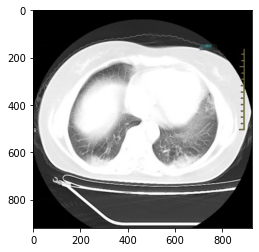

In [23]:
import cv2
import matplotlib.pyplot as plt

covid = cv2.imread(os.path.join(covidimages[0]))
plt.imshow(covid)

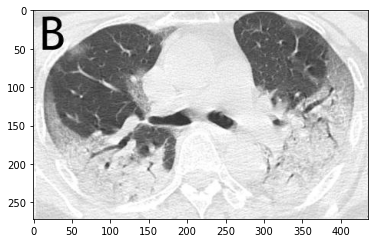

In [24]:
noncovid = cv2.imread(os.path.join(noncovidimages[1]))
plt.imshow(noncovid)

In [25]:
print(covid.shape)
print(noncovid.shape)

(920, 926, 3)
(272, 436, 3)


In [73]:
totaldata = covidimages + noncovidimages

In [27]:
pip install split-folders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [28]:
import splitfolders
inputfolder = '/content/images'

splitfolders.ratio(inputfolder, output = 'images2', seed = 42, ratio =(0.7, 0.2, 0.1), group_prefix = None)

Copying files: 746 files [00:00, 2028.74 files/s]


In [29]:
#print total number of images in each dataset
covid_train_files = os.listdir('/content/images2/train/CT_COVID')
noncovid_train_files = os.listdir('/content/images2/train/CT_NonCOVID')
covid_test_files = os.listdir('/content/images2/test/CT_COVID')
noncovid_test_files = os.listdir('/content/images2/test/CT_NonCOVID')
covid_val_files = os.listdir('/content/images2/val/CT_COVID')
noncovid_val_files = os.listdir('/content/images2/val/CT_NonCOVID')

print("Total number of train COVID images: {}".format(len(covid_train_files)))
print("Total number of train Non-COVID images: {}".format(len(noncovid_train_files)))
print("Total number of test COVID images: {}".format(len(covid_test_files)))
print("Total number of test Non-COVID images: {}".format(len(noncovid_test_files)))
print("Total number of val COVID images: {}".format(len(covid_val_files)))
print("Total number of val Non-COVID images: {}".format(len(noncovid_val_files)))

Total number of train COVID images: 244
Total number of train Non-COVID images: 277
Total number of test COVID images: 36
Total number of test Non-COVID images: 41
Total number of val COVID images: 69
Total number of val Non-COVID images: 79


<BarContainer object of 6 artists>

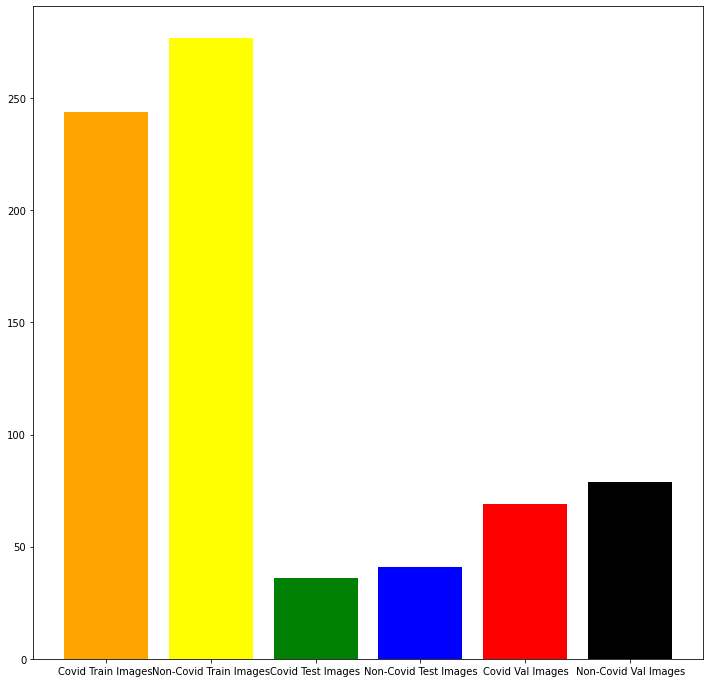

In [30]:
covid_train_files = len(os.listdir('/content/images2/train/CT_COVID'))
noncovid_train_files = len(os.listdir('/content/images2/train/CT_NonCOVID'))
covid_test_files = len(os.listdir('/content/images2/test/CT_COVID'))
noncovid_test_files = len(os.listdir('/content/images2/test/CT_NonCOVID'))
covid_val_files = len(os.listdir('/content/images2/val/CT_COVID'))
noncovid_val_files = len(os.listdir('/content/images2/val/CT_NonCOVID'))

plt.figure(figsize=(12, 12))

plt.bar(["Covid Train Images", "Non-Covid Train Images", "Covid Test Images", "Non-Covid Test Images", 'Covid Val Images', 'Non-Covid Val Images'], [covid_train_files, noncovid_train_files, covid_test_files, noncovid_test_files, covid_val_files, noncovid_val_files], color=['orange', 'yellow', 'green', 'blue', 'red', 'black'])

In [69]:
import numpy as np # linear algebra
import random
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow as tf

In [70]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [33]:
data = tf.keras.utils.image_dataset_from_directory('/content/images')

Found 746 files belonging to 2 classes.


In [34]:
data_iterator = data.as_numpy_iterator()

In [35]:
batch = data_iterator.next()

In [36]:
data = data.map(lambda x,y: (x/255, y))

In [37]:
data.as_numpy_iterator().next()

(array([[[[2.18433574e-01, 2.18433574e-01, 2.18433574e-01],
          [1.07090667e-01, 1.07090667e-01, 1.07090667e-01],
          [1.11940332e-01, 1.11940332e-01, 1.11940332e-01],
          ...,
          [1.32633641e-01, 1.26092583e-01, 1.19122617e-01],
          [8.63859281e-02, 8.16831067e-02, 7.41003901e-02],
          [2.29046747e-01, 2.21203610e-01, 2.25125179e-01]],
 
         [[3.03510308e-01, 3.03510308e-01, 3.03510308e-01],
          [1.40299127e-01, 1.40299127e-01, 1.40299127e-01],
          [1.42025039e-01, 1.42025039e-01, 1.42025039e-01],
          ...,
          [1.63890764e-01, 1.57349706e-01, 1.50379732e-01],
          [1.53395176e-01, 1.48692355e-01, 1.41109630e-01],
          [3.19577217e-01, 3.11734080e-01, 3.15655649e-01]],
 
         [[3.03546786e-01, 3.03546786e-01, 3.03546786e-01],
          [1.40695542e-01, 1.40695542e-01, 1.40695542e-01],
          [1.42105520e-01, 1.42105520e-01, 1.42105520e-01],
          ...,
          [1.88194722e-01, 1.81653664e-01, 1.7468

In [42]:
train = data.take(int(len(os.listdir('/content/images2/train'))))
test = data.take(int(len(os.listdir('/content/images2/test'))))
val = data.take(int(len(os.listdir('/content/images2/val'))))

print(train, test, val)

<TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))> <TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))> <TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>


In [51]:
batch_size = 128
imgheight = 150
imgwidth = 150

In [45]:
model = Sequential([
    Conv2D(16, 3, padding='same', activation='relu', input_shape=(imgheight, imgwidth ,3)),
    MaxPooling2D(),
    Conv2D(32, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(1)
])

In [86]:
model.compile(optimizer='adam', loss=tf.losses.BinaryCrossentropy(from_logits=True), metrics=['accuracy'])

In [87]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 75, 75, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 37, 37, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 37, 37, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 18, 18, 64)       0

In [81]:
logdirs = 'logs'
callbacks = tf.keras.callbacks.TensorBoard(log_dir=logdirs)


traindir = '/content/images2/train'
testdir = '/content/images2/test'
valdir = '/content/images2/val'
trainimagerescaler = ImageDataGenerator(rescale=1./255)
testimagerescaler = ImageDataGenerator(rescale=1./255)
valimagerescaler = ImageDataGenerator(rescale=1./255)


traindata = trainimagerescaler.flow_from_directory(batch_size= 128, directory= traindir, shuffle=True,target_size=(imgheight, imgwidth),class_mode='binary')
testdata = testimagerescaler.flow_from_directory(batch_size= 128, directory= testdir, shuffle=True,target_size=(imgheight, imgwidth),class_mode='binary')
valdata = valimagerescaler.flow_from_directory(batch_size= 128, directory= valdir, shuffle=True,target_size=(imgheight, imgwidth),class_mode='binary')
                                                                                                              

Found 521 images belonging to 2 classes.
Found 77 images belonging to 2 classes.
Found 148 images belonging to 2 classes.


In [82]:
totaltrainimgs = covid_train_files + noncovid_train_files
totaltestimgs = covid_test_files + noncovid_test_files
totalvalimgs = covid_val_files + noncovid_val_files
print(totaltrainimgs, totaltestimgs, totalvalimgs)

521 77 148


In [89]:
results = model.fit(traindata, epochs=20, validation_data=valdata, callbacks=[callbacks])

Epoch 1/20
5/5 [==============================] - 19s 4s/step - loss: 0.6792 - accuracy: 0.5432 - val_loss: 0.6622 - val_accuracy: 0.4932
Epoch 2/20
5/5 [==============================] - 17s 3s/step - loss: 0.6424 - accuracy: 0.5547 - val_loss: 0.6217 - val_accuracy: 0.7027
Epoch 3/20
5/5 [==============================] - 17s 3s/step - loss: 0.6155 - accuracy: 0.6219 - val_loss: 0.6357 - val_accuracy: 0.4932
Epoch 4/20
5/5 [==============================] - 17s 3s/step - loss: 0.6338 - accuracy: 0.5202 - val_loss: 0.6126 - val_accuracy: 0.5135
Epoch 5/20
5/5 [==============================] - 17s 4s/step - loss: 0.5922 - accuracy: 0.6564 - val_loss: 0.5872 - val_accuracy: 0.6081
Epoch 6/20
5/5 [==============================] - 21s 3s/step - loss: 0.5644 - accuracy: 0.5988 - val_loss: 0.5460 - val_accuracy: 0.6959
Epoch 7/20
5/5 [==============================] - 17s 3s/step - loss: 0.5195 - accuracy: 0.7466 - val_loss: 0.5185 - val_accuracy: 0.6757
Epoch 8/20
5/5 [==================